In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [45]:
start = '2017-01-01'
end = '2025-01-01'
stock = 'GOOG' # can change to whatever

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [46]:
data.reset_index(inplace = True) #instead of date, 0s and 1s as index

In [47]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2017-01-03,39.121704,39.295381,38.607143,38.756931,33146000
1,2017-01-04,39.159519,39.380473,38.973400,39.232173,21460000
2,2017-01-05,39.513844,39.536734,39.065964,39.118716,26704000
3,2017-01-06,40.117489,40.204578,39.423476,39.575557,32804000
4,2017-01-09,40.142365,40.307381,39.952263,40.129923,25492000
...,...,...,...,...,...,...
2007,2024-12-24,197.345184,197.445061,194.975874,195.946768,6809800
2008,2024-12-26,196.875717,197.934509,195.647106,196.516126,7907900
2009,2024-12-27,193.819183,196.576052,191.753543,196.246426,14693000


In [48]:
 ma_100_days = data.Close.rolling(100)

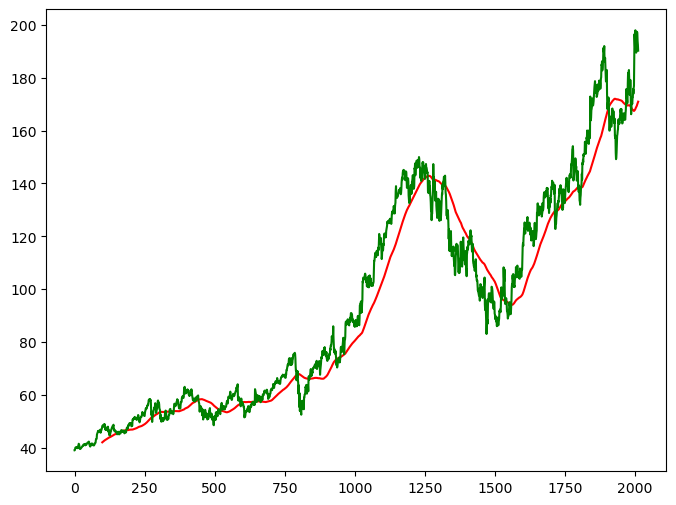

In [49]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [29]:
ma_200_days = data.Close.rolling(200).mean()

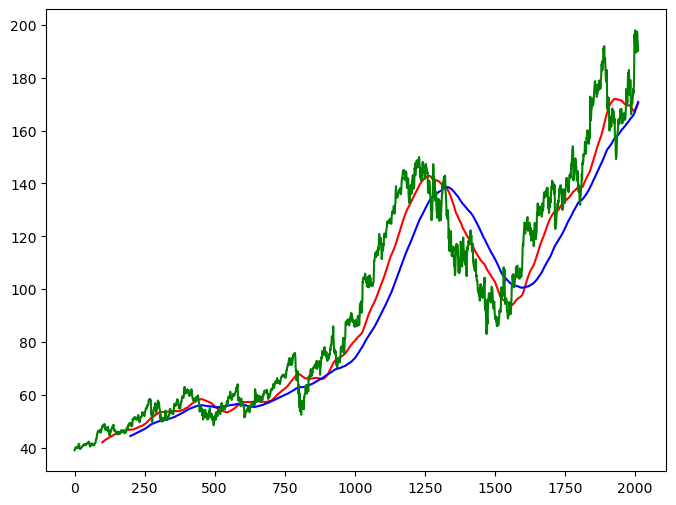

In [30]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [32]:
data.dropna(inplace = True) # drops missing values

In [38]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [39]:
data_train.shape[0] # amnt of values in data training set 80%

1609

In [40]:
data_test.shape[0] #amnt of values in testing data set 20%

403

In [41]:
from sklearn.preprocessing import MinMaxScaler # normalizes data
scaler = MinMaxScaler(feature_range = (0,1))

In [42]:
data_train_scale = scaler.fit_transform(data_train)

In [43]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i, 0])